In [178]:
import os
import numpy as np
import pandas as pd
import pickle
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [179]:
src = "/home/andres/data/hbmep-processed/J_SHAP/data.csv"
df = pd.read_csv(src)

In [180]:
df.shape

(16440, 44)

In [181]:
columns = ["part"]

In [182]:
df.columns

Index(['pulse_amplitude', 'pulse_train_frequency', 'pulse_period',
       'pulse_duration', 'pulse_count', 'train_delay', 'channel1_1',
       'channel1_2', 'channel1_3', 'channel1_4', 'channel2_1', 'channel2_2',
       'channel2_3', 'channel2_4', 'charge_params_1', 'charge_params_2',
       'charge_params_3', 'charge_params_4', 'bank_check', 'run', 'enabled',
       'channel_failA', 'channel_failB', 'channel_fail_comb', 'time_pulse',
       'time', 'ix_onsets', 'auc_2', 'auc_6', 'auc_5', 'auc_7', 'auc_1',
       'auc_4', 'auc_3', 'auc_8', 'channel1_laterality', 'channel1_segment',
       'channel2_laterality', 'channel2_segment', 'compound_position',
       'compound_charge_params', 'participant', 'subdir_pattern',
       'charge_param_error'],
      dtype='object')

In [183]:
file = open("/home/andres/repos/rat-mapping-paper/reports/J_SHAP/combine.pkl","rb")
combo = pickle.load(file)

In [184]:
combo.keys()

dict_keys([('amap01', 'C7M-C7L', '50-0-50-100', 'LADM'), ('amap01', 'C7M-C7L', '50-0-50-100', 'LBiceps'), ('amap01', 'C7M-C7L', '50-0-50-100', 'LDeltoid'), ('amap01', 'C7M-C7L', '50-0-50-100', 'LECR'), ('amap01', 'C7M-C7L', '50-0-50-100', 'LFCR'), ('amap01', 'C7M-C7L', '50-0-50-100', 'LTriceps'), ('amap01', 'C7L-', '20-0-80-25', 'LADM'), ('amap01', 'C7L-', '20-0-80-25', 'LBiceps'), ('amap01', 'C7L-', '20-0-80-25', 'LDeltoid'), ('amap01', 'C7L-', '20-0-80-25', 'LECR'), ('amap01', 'C7L-', '20-0-80-25', 'LFCR'), ('amap01', 'C7L-', '20-0-80-25', 'LTriceps'), ('amap01', 'C8L-C7L', '50-0-50-100', 'LADM'), ('amap01', 'C8L-C7L', '50-0-50-100', 'LBiceps'), ('amap01', 'C8L-C7L', '50-0-50-100', 'LDeltoid'), ('amap01', 'C8L-C7L', '50-0-50-100', 'LECR'), ('amap01', 'C8L-C7L', '50-0-50-100', 'LFCR'), ('amap01', 'C8L-C7L', '50-0-50-100', 'LTriceps'), ('amap01', 'C8L-C8M', '50-0-50-100', 'LADM'), ('amap01', 'C8L-C8M', '50-0-50-100', 'LBiceps'), ('amap01', 'C8L-C8M', '50-0-50-100', 'LDeltoid'), ('amap0

In [187]:
def threshold_array(shape):
    my_dict = {
    (key[0], key[1], key[3]): value["a"].mean() for  key,value in combo.items() if key[2] == shape
    }
    keys, values = zip(*my_dict.items())
    axis0 = np.unique([key[0] for key in keys])
    axis1 = ["Deltoid", "Biceps", "Triceps", "ECR", "FCR", "ADM"][::-1]
    pos_L = np.zeros((len(axis0), len(axis1)))
    pos_M = np.zeros((len(axis0), len(axis1)))
    for key, value in zip(keys, values):
        if key[1].split("-")[0][2:] == "L":
            pos_L[np.where(axis0 == key[0])[0], np.where(np.array(axis1) == key[2][1:])[0]] = 1/value 
        elif key[1].split("-")[0][2:] == "M":
            pos_M[np.where(axis0 == key[0])[0], np.where(np.array(axis1) == key[2][1:])[0]] = 1/value 
    return(pos_L, pos_M, axis0, axis1)

In [197]:
arr = None
responses = list(set([u[3] for u in combo.keys()]))
combinations_no_response = [(c[0], c[1], c[2]) for c in combo]
combinations_no_response = set(combinations_no_response)
combinations_no_response = list(combinations_no_response)
for muscle in responses:
    arr_muscle = None

    for c in combinations_no_response:
        a = combo[(*c, muscle)]["a"]
        a = a[:, 0, 0, 0, 0]

        if arr_muscle is None:
            arr_muscle = a[:, None]
        else:
            # concatenate now
            arr_muscle = np.concatenate([arr_muscle, a[:, None]], axis=-1)

    if arr is None:
        arr = arr_muscle[:,:, None]

    else:
        arr = np.concatenate([arr, arr_muscle[:,:, None]], axis = -1) 

TypeError: 'list' object is not callable

In [ ]:
arr.shape

(4000, 320, 6)

In [ ]:
combinations_no_response

[('amap04', 'C7M-C7L', '20-0-80-25'),
 ('amap05', '-C6L', '80-0-20-400'),
 ('amap07', 'C6L-', '50-0-50-0'),
 ('amap05', '-C7L', '50-0-50-100'),
 ('amap02', '-C8L', '50-0-50-0'),
 ('amap04', 'C7L-C6L', '80-0-20-400'),
 ('amap01', '-C8L', '50-0-50-100'),
 ('amap03', '-C7L', '50-0-50-0'),
 ('amap01', 'C8L-', '50-0-50-0'),
 ('amap04', 'C7L-', '20-0-80-25'),
 ('amap05', 'C7L-C6L', '20-0-80-25'),
 ('amap08', 'C6M-C6L', '80-0-20-400'),
 ('amap08', '-C7L', '80-0-20-400'),
 ('amap01', 'C7L-C7M', '50-0-50-0'),
 ('amap06', '-C6L', '50-0-50-100'),
 ('amap02', 'C7L-C8L', '20-0-80-25'),
 ('amap01', 'C7L-', '50-0-50-100'),
 ('amap04', 'C6L-', '50-0-50-100'),
 ('amap05', '-C7L', '50-0-50-0'),
 ('amap01', '-C8L', '50-0-50-0'),
 ('amap04', '-C7L', '50-0-50-100'),
 ('amap01', 'C8L-C7L', '50-0-50-100'),
 ('amap08', 'C6L-C7L', '20-0-80-25'),
 ('amap04', 'C7L-C6L', '20-0-80-25'),
 ('amap06', '-C6L', '50-0-50-0'),
 ('amap01', 'C7L-C8L', '20-0-80-25'),
 ('amap01', 'C7L-', '50-0-50-0'),
 ('amap02', 'C8M-C8L', 

In [ ]:
df[['participant','compound_position', 'compound_charge_params']].apply(tuple, axis = 1).nunique()

320

In [ ]:
pmono20 = np.array([bool(re.search(r'20-0-80-25', s[2])) for s in combinations_no_response])
pmono80 = np.array([bool(re.search(r'80-0-20-400', s[2])) for s in combinations_no_response])
mono = np.array([bool(re.search(r'50-0-50-100', s[2])) for s in combinations_no_response])
bip = np.array([bool(re.search(r'50-0-50-0', s[2])) for s in combinations_no_response])

lat = np.array([bool(s[1].split("-")[1][2:] == "L") for s in combinations_no_response])
med = np.array([bool(s[1].split("-")[1][2:] == "M") for s in combinations_no_response])



In [ ]:
dictBool = {}

dictBool[('lateral pmono20')] = np.array([bool(re.search(r'20-0-80-25', s[2]) and re.search(r'.+-.+', s[1]) and s[1].split("-")[0][2:] == "L") for s in combinations_no_response])
dictBool[('lateral pmono80')] = np.array([bool(re.search(r'80-0-20-400', s[2])and re.search(r'.+-.+', s[1]) and s[1].split("-")[0][2:] == "L") for s in combinations_no_response])
dictBool[('lateral bip')] = np.array([bool(re.search(r'50-0-50-100', s[2])and re.search(r'.+-.+', s[1]) and s[1].split("-")[0][2:] == "L") for s in combinations_no_response])
dictBool[('lateral mono')] = np.array([bool(re.search(r'50-0-50-0', s[2])and re.search(r'.+-.+', s[1]) and s[1].split("-")[0][2:] == "L") for s in combinations_no_response])

dictBool[('medial pmono20')] = np.array([bool(re.search(r'20-0-80-25', s[2])and re.search(r'.+-.+', s[1]) and s[1].split("-")[0][2:] == "M") for s in combinations_no_response])
dictBool[('medial pmono80')] = np.array([bool(re.search(r'80-0-20-400', s[2])and re.search(r'.+-.+', s[1]) and s[1].split("-")[0][2:] == "M") for s in combinations_no_response])
dictBool[('medial bip')] = np.array([bool(re.search(r'50-0-50-100', s[2])and re.search(r'.+-.+', s[1]) and s[1].split("-")[0][2:] == "M") for s in combinations_no_response])
dictBool[('medial mono')] = np.array([bool(re.search(r'50-0-50-0', s[2])and re.search(r'.+-.+', s[1]) and s[1].split("-")[0][2:] == "M") for s in combinations_no_response])


In [ ]:
A = arr[:,dictBool[('lateral pmono20')],:].mean(axis=0)

In [ ]:
# A.reshape(-1,).shape

In [ ]:
diplot = {}

diplot[('L-M pmono20')] = np.array([bool(re.search(r'20-0-80-25', s[2]) and s[1].split("-")[0][2:] == "L" and s[1].split("-")[1][2:] == "M") for s in combinations_no_response])
diplot[('L-M pmono80')] = np.array([bool(re.search(r'80-0-20-400', s[2])and s[1].split("-")[0][2:] == "L" and s[1].split("-")[1][2:] == "M") for s in combinations_no_response])
diplot[('L-M bip')] = np.array([bool(re.search(r'50-0-50-100', s[2])and s[1].split("-")[0][2:] == "L" and s[1].split("-")[1][2:] == "M") for s in combinations_no_response])
diplot[('L-M mono')] = np.array([bool(re.search(r'50-0-50-0', s[2])and s[1].split("-")[0][2:] == "L" and s[1].split("-")[1][2:] == "M") for s in combinations_no_response])

diplot[('M-L pmono20')] = np.array([bool(re.search(r'20-0-80-25', s[2]) and s[1].split("-")[1][2:] == "L" and s[1].split("-")[0][2:] == "M") for s in combinations_no_response])
diplot[('M-L pmono80')] = np.array([bool(re.search(r'80-0-20-400', s[2])and s[1].split("-")[1][2:] == "L" and s[1].split("-")[0][2:] == "M") for s in combinations_no_response])
diplot[('M-L bip')] = np.array([bool(re.search(r'50-0-50-100', s[2])and s[1].split("-")[1][2:] == "L" and s[1].split("-")[0][2:] == "M") for s in combinations_no_response])
diplot[('M-L mono')] = np.array([bool(re.search(r'50-0-50-0', s[2])and s[1].split("-")[1][2:] == "L" and s[1].split("-")[0][2:] == "M") for s in combinations_no_response])

diplot[('ground - position mono')] = np.array([bool(s[1].split("-")[0][2:] == "" and re.search(r'50-0-50-0', s[2])) for s in combinations_no_response])
diplot[('position - ground mono')] = np.array([bool(s[1].split("-")[1][2:] == "" and re.search(r'50-0-50-0', s[2])) for s in combinations_no_response])

diplot[('ground - position p20')] = np.array([bool(s[1].split("-")[0][2:] == "" and re.search(r'20-0-80-25', s[2])) for s in combinations_no_response])
diplot[('position - ground p20')] = np.array([bool(s[1].split("-")[1][2:] == "" and re.search(r'20-0-80-25', s[2])) for s in combinations_no_response])

diplot[('ground - position p80')] = np.array([bool(s[1].split("-")[0][2:] == "" and re.search(r'80-0-20-400', s[2])) for s in combinations_no_response])
diplot[('position - ground p80')] = np.array([bool(s[1].split("-")[1][2:] == "" and re.search(r'80-0-20-400', s[2])) for s in combinations_no_response])

diplot[('ground - position bip')] = np.array([bool(s[1].split("-")[0][2:] == "" and re.search(r'50-0-50-100', s[2])) for s in combinations_no_response])
diplot[('position - ground bip')] = np.array([bool(s[1].split("-")[1][2:] == "" and re.search(r'50-0-50-100', s[2])) for s in combinations_no_response])

In [ ]:
A.mean()

159.82804525509846

In [ ]:
stats.sem(A.reshape(-1,))

9.19492007716287

In [ ]:
value = []
for b,v in dictBool.items():
    for b1, v1 in dictBool.items():
        A = arr[:,v,:].mean(axis = 0).reshape(-1,)
        B = arr[:,v1,:].mean(axis = 0).reshape(-1,)
        tbvs, pbvs = stats.ttest_ind(B,A, alternative="less")
        if pbvs < 0.05:
            value.append(f"{b1} is more effective than {b} (p = {pbvs})")
        else: value.append(f"No significant difference for {b1} vs {b} (p = {pbvs})")

In [ ]:
A = arr[:,mono,:].mean(axis = 0).reshape(-1,)
B = arr[:,bip,:].mean(axis = 0).reshape(-1,)

tbvs, pbvs = stats.ttest_ind(B,A, alternative="less")

pbvs

0.9999996519248618

In [ ]:
value

['No significant difference for lateral pmono20 vs lateral pmono20 (p = 0.5)',
 'No significant difference for lateral pmono80 vs lateral pmono20 (p = 0.2488507375822367)',
 'No significant difference for lateral bip vs lateral pmono20 (p = 0.13371095690032442)',
 'No significant difference for lateral mono vs lateral pmono20 (p = 0.7217150520969153)',
 'No significant difference for medial pmono20 vs lateral pmono20 (p = 0.9977754747869669)',
 'No significant difference for medial pmono80 vs lateral pmono20 (p = 0.9884524148383961)',
 'No significant difference for medial bip vs lateral pmono20 (p = 0.6939039894212642)',
 'No significant difference for medial mono vs lateral pmono20 (p = 0.9999413360281021)',
 'No significant difference for lateral pmono20 vs lateral pmono80 (p = 0.7511492624177634)',
 'No significant difference for lateral pmono80 vs lateral pmono80 (p = 0.5)',
 'No significant difference for lateral bip vs lateral pmono80 (p = 0.339606902913121)',
 'No significant d

In [ ]:
a = set(u[1] for u in combinations_no_response)
a

{'-C6L',
 '-C7L',
 '-C8L',
 'C6L-',
 'C6L-C6M',
 'C6L-C7L',
 'C6M-C6L',
 'C7L-',
 'C7L-C6L',
 'C7L-C7M',
 'C7L-C8L',
 'C7M-C7L',
 'C8L-',
 'C8L-C7L',
 'C8L-C8M',
 'C8M-C8L'}

In [ ]:
C61 = np.array([bool(re.search(r'50-0-50-0', s[2]) and ("C6" in s[1].split("-")[0][0:] or "C6" in s[1].split("-")[1][0:])) for s in combinations_no_response])
C71 = np.array([bool(re.search(r'50-0-50-0', s[2]) and ("C7" in s[1].split("-")[0][0:] or "C7" in s[1].split("-")[1][0:])) for s in combinations_no_response])
C81 = np.array([bool(re.search(r'50-0-50-0', s[2]) and ("C8" in s[1].split("-")[0][0:] or "C8" in s[1].split("-")[1][0:])) for s in combinations_no_response])

C62 = np.array([bool(re.search(r'20-0-80-25', s[2]) and ("C6" in s[1].split("-")[0][0:] or "C6" in s[1].split("-")[1][0:])) for s in combinations_no_response])
C72 = np.array([bool(re.search(r'20-0-80-25', s[2]) and ("C7" in s[1].split("-")[0][0:] or "C7" in s[1].split("-")[1][0:])) for s in combinations_no_response])
C82 = np.array([bool(re.search(r'20-0-80-25', s[2]) and ("C8" in s[1].split("-")[0][0:] or "C8" in s[1].split("-")[1][0:])) for s in combinations_no_response])

C63 = np.array([bool(re.search(r'80-0-20-400', s[2]) and ("C6" in s[1].split("-")[0][0:] or "C6" in s[1].split("-")[1][0:])) for s in combinations_no_response])
C73 = np.array([bool(re.search(r'80-0-20-400', s[2]) and ("C7" in s[1].split("-")[0][0:] or "C7" in s[1].split("-")[1][0:])) for s in combinations_no_response])
C83 = np.array([bool(re.search(r'80-0-20-400', s[2]) and ("C8" in s[1].split("-")[0][0:] or "C8" in s[1].split("-")[1][0:])) for s in combinations_no_response])

C64 = np.array([bool(re.search(r'50-0-50-100', s[2]) and ("C6" in s[1].split("-")[0][0:] or "C6" in s[1].split("-")[1][0:])) for s in combinations_no_response])
C74 = np.array([bool(re.search(r'50-0-50-100', s[2]) and ("C7" in s[1].split("-")[0][0:] or "C7" in s[1].split("-")[1][0:])) for s in combinations_no_response])
C84 = np.array([bool(re.search(r'50-0-50-100', s[2]) and ("C8" in s[1].split("-")[0][0:] or "C8" in s[1].split("-")[1][0:])) for s in combinations_no_response])

In [ ]:
C = arr[:,C71,:].mean(axis = 0).reshape(-1,)
D = arr[:,C81,:].mean(axis = 0).reshape(-1,)

tbvs, pbvs = stats.ttest_ind(C,D, alternative="less")

pbvs

2.9022671961367066e-12

In [ ]:
C74.sum()

48

Graphing if we want group comparison

In [ ]:
def graph_arr(charge):
    L, M, subject, muscle = threshold_array(charge)
    sub_meanS = np.median(L, axis=0)
    rowS = np.vsplit(L,len(subject))
    rowS = [i.tolist() for i in rowS]
    sub_meanL = np.median(M, axis=0)
    rowL = np.vsplit(M,len(subject))
    rowL = [i.tolist() for i in rowL]
    for xval_ind, xval in enumerate(rowS):
        # plt.plot(xval[0], muscle, linestyle='dashed', marker=".", markersize=20, alpha =0.3, color = "pink")
        plt.plot(sub_meanS,muscle, color = "red", linestyle='dashed', marker=".", markersize=20, label="Lateral" if xval_ind == 0 else None)
        # plt.legend('Lateral')
    for xval_ind,xval in enumerate(rowL):
        # plt.plot(xval[0], muscle, linestyle='dashed', marker=".", markersize=25, alpha =0.3, color = "blue")
        plt.plot(sub_meanL,muscle, color = "black", linestyle='dashed', marker=".", markersize=20, label="Medial" if xval_ind == 1 else None)
        # plt.legend('Medial')
    plt.yticks(weight ='bold',style = 'italic')
    plt.xlabel('Efficacy')
    plt.legend()
    plt.show()
    

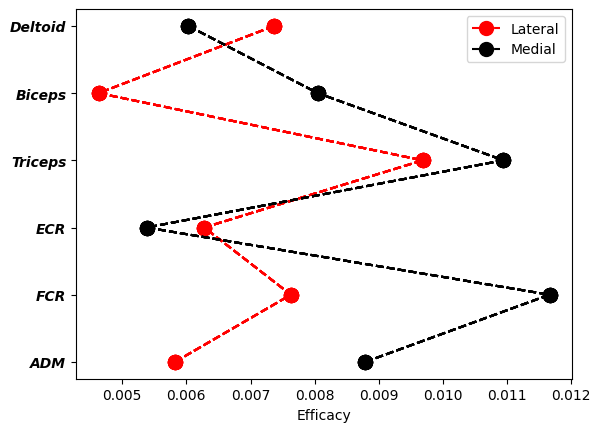

In [ ]:
graph_arr("20-0-80-25")

## Rostral Caudal

In [ ]:
a

{'-C6L',
 '-C7L',
 '-C8L',
 'C6L-',
 'C6L-C6M',
 'C6L-C7L',
 'C6M-C6L',
 'C7L-',
 'C7L-C6L',
 'C7L-C7M',
 'C7L-C8L',
 'C7M-C7L',
 'C8L-',
 'C8L-C7L',
 'C8L-C8M',
 'C8M-C8L'}

In [ ]:
C67b = np.array([bool(re.search(r'50-0-50-0', s[2]) and ("C6" in s[1].split("-")[0][0:] and "C7" in s[1].split("-")[1][0:])) for s in combinations_no_response])
C76b = np.array([bool(re.search(r'50-0-50-0', s[2]) and ("C7" in s[1].split("-")[0][0:] and "C6" in s[1].split("-")[1][0:])) for s in combinations_no_response])

C78b = np.array([bool(re.search(r'50-0-50-0', s[2]) and ("C7" in s[1].split("-")[0][0:] and "C8" in s[1].split("-")[1][0:])) for s in combinations_no_response])
C87b = np.array([bool(re.search(r'50-0-50-0', s[2]) and ("C8" in s[1].split("-")[0][0:] and "C7" in s[1].split("-")[1][0:])) for s in combinations_no_response])

C67m = np.array([bool(re.search(r'50-0-50-100', s[2]) and ("C6" in s[1].split("-")[0][0:] and "C7" in s[1].split("-")[1][0:])) for s in combinations_no_response])
C76m = np.array([bool(re.search(r'50-0-50-100', s[2]) and ("C7" in s[1].split("-")[0][0:] and "C6" in s[1].split("-")[1][0:])) for s in combinations_no_response])

C78m = np.array([bool(re.search(r'50-0-50-100', s[2]) and ("C7" in s[1].split("-")[0][0:] and "C8" in s[1].split("-")[1][0:])) for s in combinations_no_response])
C87m = np.array([bool(re.search(r'50-0-50-100', s[2]) and ("C8" in s[1].split("-")[0][0:] and "C7" in s[1].split("-")[1][0:])) for s in combinations_no_response])

C67p80 = np.array([bool(re.search(r'80-0-20-400', s[2]) and ("C6" in s[1].split("-")[0][0:] and "C7" in s[1].split("-")[1][0:])) for s in combinations_no_response])
C76p80 = np.array([bool(re.search(r'80-0-20-400', s[2]) and ("C7" in s[1].split("-")[0][0:] and "C6" in s[1].split("-")[1][0:])) for s in combinations_no_response])

C78p80 = np.array([bool(re.search(r'80-0-20-400', s[2]) and ("C7" in s[1].split("-")[0][0:] and "C8" in s[1].split("-")[1][0:])) for s in combinations_no_response])
C87p80 = np.array([bool(re.search(r'80-0-20-400', s[2]) and ("C8" in s[1].split("-")[0][0:] and "C7" in s[1].split("-")[1][0:])) for s in combinations_no_response])

C67p20 = np.array([bool(re.search(r'20-0-80-25', s[2]) and ("C6" in s[1].split("-")[0][0:] and "C7" in s[1].split("-")[1][0:])) for s in combinations_no_response])
C76p20 = np.array([bool(re.search(r'20-0-80-25', s[2]) and ("C7" in s[1].split("-")[0][0:] and "C6" in s[1].split("-")[1][0:])) for s in combinations_no_response])

C78p20 = np.array([bool(re.search(r'20-0-80-25', s[2]) and ("C7" in s[1].split("-")[0][0:] and "C8" in s[1].split("-")[1][0:])) for s in combinations_no_response])
C87p20 = np.array([bool(re.search(r'20-0-80-25', s[2]) and ("C8" in s[1].split("-")[0][0:] and "C7" in s[1].split("-")[1][0:])) for s in combinations_no_response])


In [ ]:
rost = arr[:,C67m,:].mean(axis = 0)

rost.shape

(5, 6)

In [ ]:
np.sort(np.array(combinations_no_response)[C67m], axis=0)

array([['amap04', 'C6L-C7L', '50-0-50-100'],
       ['amap05', 'C6L-C7L', '50-0-50-100'],
       ['amap06', 'C6L-C7L', '50-0-50-100'],
       ['amap07', 'C6L-C7L', '50-0-50-100'],
       ['amap08', 'C6L-C7L', '50-0-50-100']], dtype='<U11')

In [ ]:
t = np.array(combinations_no_response)[C76m]

t

array([['amap06', 'C7L-C6L', '50-0-50-100'],
       ['amap04', 'C7L-C6L', '50-0-50-100'],
       ['amap05', 'C7L-C6L', '50-0-50-100'],
       ['amap08', 'C7L-C6L', '50-0-50-100'],
       ['amap07', 'C7L-C6L', '50-0-50-100']], dtype='<U11')

In [ ]:
np.matrix.argsort(t, axis=0)

array([[1, 0, 0],
       [2, 1, 1],
       [0, 2, 2],
       [4, 3, 3],
       [3, 4, 4]])

In [ ]:
ind = np.argsort(t, axis=0)

In [ ]:
np.take_along_axis(t, ind, axis=0)

array([['amap04', 'C7L-C6L', '50-0-50-100'],
       ['amap05', 'C7L-C6L', '50-0-50-100'],
       ['amap06', 'C7L-C6L', '50-0-50-100'],
       ['amap07', 'C7L-C6L', '50-0-50-100'],
       ['amap08', 'C7L-C6L', '50-0-50-100']], dtype='<U11')

In [ ]:
t[np.matrix.argsort(t, axis=0)]

array([[['amap04', 'C7L-C6L', '50-0-50-100'],
        ['amap06', 'C7L-C6L', '50-0-50-100'],
        ['amap06', 'C7L-C6L', '50-0-50-100']],

       [['amap05', 'C7L-C6L', '50-0-50-100'],
        ['amap04', 'C7L-C6L', '50-0-50-100'],
        ['amap04', 'C7L-C6L', '50-0-50-100']],

       [['amap06', 'C7L-C6L', '50-0-50-100'],
        ['amap05', 'C7L-C6L', '50-0-50-100'],
        ['amap05', 'C7L-C6L', '50-0-50-100']],

       [['amap07', 'C7L-C6L', '50-0-50-100'],
        ['amap08', 'C7L-C6L', '50-0-50-100'],
        ['amap08', 'C7L-C6L', '50-0-50-100']],

       [['amap08', 'C7L-C6L', '50-0-50-100'],
        ['amap07', 'C7L-C6L', '50-0-50-100'],
        ['amap07', 'C7L-C6L', '50-0-50-100']]], dtype='<U11')

In [ ]:
t = np.array(["C", "A", "B", "D"])

np.argsort(t)

array([1, 2, 0, 3])

In [ ]:
np.sort(t)

array(['A', 'B', 'C', 'D'], dtype='<U1')

In [ ]:
t[np.argsort(t)]

array(['A', 'B', 'C', 'D'], dtype='<U1')

In [ ]:
np.sort(np.array(combinations_no_response)[C76m], axis=0)


array([['amap04', 'C7L-C6L', '50-0-50-100'],
       ['amap05', 'C7L-C6L', '50-0-50-100'],
       ['amap06', 'C7L-C6L', '50-0-50-100'],
       ['amap07', 'C7L-C6L', '50-0-50-100'],
       ['amap08', 'C7L-C6L', '50-0-50-100']], dtype='<U11')

In [ ]:
caud = arr[:,C76m,:].mean(axis = 0)
caud.shape

(5, 6)

In [ ]:
np.sort(np.array(combinations_no_response)[C76m])


array([['50-0-50-100', 'C7L-C6L', 'amap06'],
       ['50-0-50-100', 'C7L-C6L', 'amap04'],
       ['50-0-50-100', 'C7L-C6L', 'amap05'],
       ['50-0-50-100', 'C7L-C6L', 'amap08'],
       ['50-0-50-100', 'C7L-C6L', 'amap07']], dtype='<U11')

In [ ]:
rost.shape

(5, 6)

In [ ]:
db = {}

db['C67b'] = np.array([bool(re.search(r'50-0-50-0', s[2]) and ("C6" in s[1].split("-")[0][0:] and "C7" in s[1].split("-")[1][0:])) for s in combinations_no_response])
db['C76b'] = np.array([bool(re.search(r'50-0-50-0', s[2]) and ("C7" in s[1].split("-")[0][0:] and "C6" in s[1].split("-")[1][0:])) for s in combinations_no_response])

db['C78b'] = np.array([bool(re.search(r'50-0-50-0', s[2]) and ("C7" in s[1].split("-")[0][0:] and "C8" in s[1].split("-")[1][0:])) for s in combinations_no_response])
db['C87b'] = np.array([bool(re.search(r'50-0-50-0', s[2]) and ("C8" in s[1].split("-")[0][0:] and "C7" in s[1].split("-")[1][0:])) for s in combinations_no_response])

db['C67m'] = np.array([bool(re.search(r'50-0-50-100', s[2]) and ("C6" in s[1].split("-")[0][0:] and "C7" in s[1].split("-")[1][0:])) for s in combinations_no_response])
db['C76m'] = np.array([bool(re.search(r'50-0-50-100', s[2]) and ("C7" in s[1].split("-")[0][0:] and "C6" in s[1].split("-")[1][0:])) for s in combinations_no_response])

db['C78m'] = np.array([bool(re.search(r'50-0-50-100', s[2]) and ("C7" in s[1].split("-")[0][0:] and "C8" in s[1].split("-")[1][0:])) for s in combinations_no_response])
db['C87m'] = np.array([bool(re.search(r'50-0-50-100', s[2]) and ("C8" in s[1].split("-")[0][0:] and "C7" in s[1].split("-")[1][0:])) for s in combinations_no_response])

db['C67p80'] = np.array([bool(re.search(r'80-0-20-400', s[2]) and ("C6" in s[1].split("-")[0][0:] and "C7" in s[1].split("-")[1][0:])) for s in combinations_no_response])
db['C76p80'] = np.array([bool(re.search(r'80-0-20-400', s[2]) and ("C7" in s[1].split("-")[0][0:] and "C6" in s[1].split("-")[1][0:])) for s in combinations_no_response])

db['C78p80'] = np.array([bool(re.search(r'80-0-20-400', s[2]) and ("C7" in s[1].split("-")[0][0:] and "C8" in s[1].split("-")[1][0:])) for s in combinations_no_response])
db['C87p80'] = np.array([bool(re.search(r'80-0-20-400', s[2]) and ("C8" in s[1].split("-")[0][0:] and "C7" in s[1].split("-")[1][0:])) for s in combinations_no_response])

db['C67p20'] = np.array([bool(re.search(r'20-0-80-25', s[2]) and ("C6" in s[1].split("-")[0][0:] and "C7" in s[1].split("-")[1][0:])) for s in combinations_no_response])
db['C76p20'] = np.array([bool(re.search(r'20-0-80-25', s[2]) and ("C7" in s[1].split("-")[0][0:] and "C6" in s[1].split("-")[1][0:])) for s in combinations_no_response])

db['C78p20'] = np.array([bool(re.search(r'20-0-80-25', s[2]) and ("C7" in s[1].split("-")[0][0:] and "C8" in s[1].split("-")[1][0:])) for s in combinations_no_response])
db['C87p20'] = np.array([bool(re.search(r'20-0-80-25', s[2]) and ("C8" in s[1].split("-")[0][0:] and "C7" in s[1].split("-")[1][0:])) for s in combinations_no_response])

In [ ]:
#L vs M
db['C67b'] = np.array([bool(re.search(r'50-0-50-0', s[2]) and (s[1].split("-")[0][0:] < s[1].split("-")[1][0:])) for s in combinations_no_response])


In [ ]:
"C5M" < "C6L" 

True

In [ ]:
rost = arr[:,db['C76m'],:].mean(axis = 0)
rost.shape

(5, 6)

In [ ]:
tlist = []

for k, v in db.items(): 
    for k1, v1 in db.items():
        rost = arr[:,v,:].mean(axis = 0)
        caud = arr[:,v1,:].mean(axis = 0)
        # print(k, rost.shape, caud.shape, k[3:] == k1[3:])
        if (rost.shape == caud.shape) and (k[3:] == k1[3:] and k!= k1):
            # print(k, k1)
            temp1_combinations = np.array(combinations_no_response)[v]
            temp1_ind = np.argsort(temp1_combinations, axis=0)
            rost = rost[temp1_ind[:, 0], :]

            temp_combinations = np.array(combinations_no_response)[v1]
            temp_ind = np.argsort(temp_combinations, axis=0)
            caud = caud[temp_ind[:, 0], :]

            rost = rost.reshape(-1,)
            caud = caud.reshape(-1,)
            a = stats.ttest_rel(rost,caud, alternative="less")
            tlist.append(f"The p value for {k} vs {k1} is {a.pvalue}")
        else: continue


In [ ]:
tlist

['The p value for C78b vs C87b is 0.964256564673948',
 'The p value for C87b vs C78b is 0.03574343532605192',
 'The p value for C67m vs C76m is 0.9418045017055068',
 'The p value for C76m vs C67m is 0.058195498294493206',
 'The p value for C78m vs C87m is 0.00033960400336569506',
 'The p value for C87m vs C78m is 0.9996603959966344',
 'The p value for C67p80 vs C76p80 is 0.9644580424533974',
 'The p value for C76p80 vs C67p80 is 0.035541957546602575',
 'The p value for C78p80 vs C87p80 is 0.0018929713203402383',
 'The p value for C87p80 vs C78p80 is 0.9981070286796597',
 'The p value for C67p20 vs C76p20 is 0.13975131480136166',
 'The p value for C76p20 vs C67p20 is 0.8602486851986384',
 'The p value for C78p20 vs C87p20 is 0.9499706323692025',
 'The p value for C87p20 vs C78p20 is 0.050029367630797475']

In [ ]:
a = stats.ttest_rel(rost,caud, alternative="less")
a.pvalue


array([nan, nan, nan, nan, nan, nan])

## Ground 

In [ ]:
mybool = {}
mybool[('ground - position mono')] = np.array([bool(s[1].split("-")[0][2:] == "" and re.search(r'50-0-50-0', s[2])) for s in combinations_no_response])
mybool[('position - ground mono')] = np.array([bool(s[1].split("-")[1][2:] == "" and re.search(r'50-0-50-0', s[2])) for s in combinations_no_response])

mybool[('ground - position p20')] = np.array([bool(s[1].split("-")[0][2:] == "" and re.search(r'20-0-80-25', s[2])) for s in combinations_no_response])
mybool[('position - ground p20')] = np.array([bool(s[1].split("-")[1][2:] == "" and re.search(r'20-0-80-25', s[2])) for s in combinations_no_response])

mybool[('ground - position p80')] = np.array([bool(s[1].split("-")[0][2:] == "" and re.search(r'80-0-20-400', s[2])) for s in combinations_no_response])
mybool[('position - ground p80')] = np.array([bool(s[1].split("-")[1][2:] == "" and re.search(r'80-0-20-400', s[2])) for s in combinations_no_response])

mybool[('ground - position bip')] = np.array([bool(s[1].split("-")[0][2:] == "" and re.search(r'50-0-50-100', s[2])) for s in combinations_no_response])
mybool[('position - ground bip')] = np.array([bool(s[1].split("-")[1][2:] == "" and re.search(r'50-0-50-100', s[2])) for s in combinations_no_response])

In [ ]:
l = set(k[1] for k in combo.keys())
l

{'-C6L',
 '-C7L',
 '-C8L',
 'C6L-',
 'C6L-C6M',
 'C6L-C7L',
 'C6M-C6L',
 'C7L-',
 'C7L-C6L',
 'C7L-C7M',
 'C7L-C8L',
 'C7M-C7L',
 'C8L-',
 'C8L-C7L',
 'C8L-C8M',
 'C8M-C8L'}

In [ ]:
gvalue = []
for b,v in mybool.items():
    for b1, v1 in mybool.items():
        A = arr[:,v,:].mean(axis = 0).reshape(-1,)
        B = arr[:,v1,:].mean(axis = 0).reshape(-1,)
        tbvs, pbvs = stats.ttest_ind(B,A, alternative="less")
        if pbvs < 0.05:
            gvalue.append(f"{b1} is more effective than {b} (p = {pbvs})")
        else: gvalue.append(f"No significant difference for {b1} vs {b} (p = {pbvs})")

In [ ]:
gvalue

['No significant difference for ground - position mono vs ground - position mono (p = 0.5)',
 'No significant difference for position - ground mono vs ground - position mono (p = 0.9999999999999388)',
 'No significant difference for ground - position p20 vs ground - position mono (p = 0.5524870400308437)',
 'No significant difference for position - ground p20 vs ground - position mono (p = 0.9999999999972042)',
 'No significant difference for ground - position p80 vs ground - position mono (p = 0.9999996434502291)',
 'No significant difference for position - ground p80 vs ground - position mono (p = 0.42577787404621154)',
 'No significant difference for ground - position bip vs ground - position mono (p = 0.8182051477061761)',
 'No significant difference for position - ground bip vs ground - position mono (p = 0.5771767024003044)',
 'ground - position mono is more effective than position - ground mono (p = 6.115689694642182e-14)',
 'No significant difference for position - ground mono 

## Plotting Data

In [ ]:
diplot = {}

diplot[('L-M pmono20')] = np.array([bool(re.search(r'20-0-80-25', s[2]) and s[1].split("-")[0][2:] == "L" and s[1].split("-")[1][2:] == "M") for s in combinations_no_response])
diplot[('L-M pmono80')] = np.array([bool(re.search(r'80-0-20-400', s[2])and s[1].split("-")[0][2:] == "L" and s[1].split("-")[1][2:] == "M") for s in combinations_no_response])
diplot[('L-M bip')] = np.array([bool(re.search(r'50-0-50-100', s[2])and s[1].split("-")[0][2:] == "L" and s[1].split("-")[1][2:] == "M") for s in combinations_no_response])
diplot[('L-M mono')] = np.array([bool(re.search(r'50-0-50-0', s[2])and s[1].split("-")[0][2:] == "L" and s[1].split("-")[1][2:] == "M") for s in combinations_no_response])

diplot[('M-L pmono20')] = np.array([bool(re.search(r'20-0-80-25', s[2]) and s[1].split("-")[1][2:] == "L" and s[1].split("-")[0][2:] == "M") for s in combinations_no_response])
diplot[('M-L pmono80')] = np.array([bool(re.search(r'80-0-20-400', s[2])and s[1].split("-")[1][2:] == "L" and s[1].split("-")[0][2:] == "M") for s in combinations_no_response])
diplot[('M-L bip')] = np.array([bool(re.search(r'50-0-50-100', s[2])and s[1].split("-")[1][2:] == "L" and s[1].split("-")[0][2:] == "M") for s in combinations_no_response])
diplot[('M-L mono')] = np.array([bool(re.search(r'50-0-50-0', s[2])and s[1].split("-")[1][2:] == "L" and s[1].split("-")[0][2:] == "M") for s in combinations_no_response])

diplot[('ground-position mono')] = np.array([bool(s[1].split("-")[0][2:] == "" and re.search(r'50-0-50-0', s[2])) for s in combinations_no_response])
diplot[('position-ground mono')] = np.array([bool(s[1].split("-")[1][2:] == "" and re.search(r'50-0-50-0', s[2])) for s in combinations_no_response])

diplot[('ground-position pmono20')] = np.array([bool(s[1].split("-")[0][2:] == "" and re.search(r'20-0-80-25', s[2])) for s in combinations_no_response])
diplot[('position-ground pmono20')] = np.array([bool(s[1].split("-")[1][2:] == "" and re.search(r'20-0-80-25', s[2])) for s in combinations_no_response])

diplot[('ground-position pmono80')] = np.array([bool(s[1].split("-")[0][2:] == "" and re.search(r'80-0-20-400', s[2])) for s in combinations_no_response])
diplot[('position-ground pmono80')] = np.array([bool(s[1].split("-")[1][2:] == "" and re.search(r'80-0-20-400', s[2])) for s in combinations_no_response])

diplot[('ground-position bip')] = np.array([bool(s[1].split("-")[0][2:] == "" and re.search(r'50-0-50-100', s[2])) for s in combinations_no_response])
diplot[('position-ground bip')] = np.array([bool(s[1].split("-")[1][2:] == "" and re.search(r'50-0-50-100', s[2])) for s in combinations_no_response])

diplot['R-C mono'] = np.array([bool(re.search(r'50-0-50-0', s[2]) and (s[1].split("-")[0][0:] < s[1].split("-")[1][0:])) for s in combinations_no_response])
diplot['R-C bip'] = np.array([bool(re.search(r'50-0-50-100', s[2]) and (s[1].split("-")[0][0:] < s[1].split("-")[1][0:])) for s in combinations_no_response])
diplot['R-C pmono20'] = np.array([bool(re.search(r'20-0-80-25', s[2]) and (s[1].split("-")[0][0:] < s[1].split("-")[1][0:])) for s in combinations_no_response])
diplot['R-C pmono80'] = np.array([bool(re.search(r'80-0-20-400', s[2]) and (s[1].split("-")[0][0:] < s[1].split("-")[1][0:])) for s in combinations_no_response])

diplot['C-R mono'] = np.array([bool(re.search(r'50-0-50-0', s[2]) and (s[1].split("-")[0][0:] > s[1].split("-")[1][0:])) for s in combinations_no_response])
diplot['C-R bip'] = np.array([bool(re.search(r'50-0-50-100', s[2]) and (s[1].split("-")[0][0:] > s[1].split("-")[1][0:])) for s in combinations_no_response])
diplot['C-R pmono20'] = np.array([bool(re.search(r'20-0-80-25', s[2]) and (s[1].split("-")[0][0:] > s[1].split("-")[1][0:])) for s in combinations_no_response])
diplot['C-R pmono80'] = np.array([bool(re.search(r'80-0-20-400', s[2]) and (s[1].split("-")[0][0:] > s[1].split("-")[1][0:])) for s in combinations_no_response])


In [ ]:
my_plotdict = {}
for k, v in diplot.items():
    my_plotdict[k] = arr[:,v,:].mean(axis=0).reshape(-1)

In [ ]:
my_plotdict.keys()

dict_keys(['L-M pmono20', 'L-M pmono80', 'L-M bip', 'L-M mono', 'M-L pmono20', 'M-L pmono80', 'M-L bip', 'M-L mono', 'ground-position mono', 'position-ground mono', 'ground-position pmono20', 'position-ground pmono20', 'ground-position pmono80', 'position-ground pmono80', 'ground-position bip', 'position-ground bip', 'R-C mono', 'R-C bip', 'R-C pmono20', 'R-C pmono80', 'C-R mono', 'C-R bip', 'C-R pmono20', 'C-R pmono80'])

In [ ]:
x = ['Rostral vs Caudal', 'Ground Position', 'Lateral vs Medial']

yrc = []
ygp = []
ylm = []
y=[yrc, ygp, ylm]

shape = []
order = []

for k, v in my_plotdict.items():
    t= k.split(" ")[1]
    shape.append(t)
    if "L" in k:
        v = v.mean()
        ylm.append(v)
        if "L-M" in k:
            order.append("anode")
        elif "M-L" in k:
            order.append("cathode")
    elif "R" in k:
        v = v.mean()
        yrc.append(v)
        if "R-C" in k:
            order.append("cathode")
        elif "C-R" in k:
            order.append("anode")
    elif "ground" in k:
        v = v.mean()
        ygp.append(v)
        if "ground-position" in k:
            order.append("cathode")
        elif "position-ground" in k:
            order.append("anode")
    else: continue

df = pd.DataFrame(list(zip(x, y)),
               columns =['Name', 'val'])

In [ ]:
type = ["Rostral vs Caudal" for _ in  range(len(yrc))] + ["Ground Position" for _ in  range(len(ygp))] + ["Lateral vs Medial" for _ in  range(len(ylm))]
vals = yrc + ygp + ylm

df = pd.DataFrame(list(zip(type, vals, shape, order)),
               columns =['Name', 'Val', 'Shape', 'Order'])

In [ ]:
df

,Name,Val,Shape,Order
0,Rostral vs Caudal,163.815162,pmono20,anode
1,Rostral vs Caudal,154.807835,pmono80,anode
2,Rostral vs Caudal,159.641125,bip,anode
3,Rostral vs Caudal,185.517177,mono,anode
4,Rostral vs Caudal,223.162297,pmono20,cathode
5,Rostral vs Caudal,150.067799,pmono80,cathode
6,Rostral vs Caudal,217.403293,bip,cathode
7,Rostral vs Caudal,160.252974,mono,cathode
8,Ground Position,142.725187,mono,cathode
9,Ground Position,264.995267,mono,anode


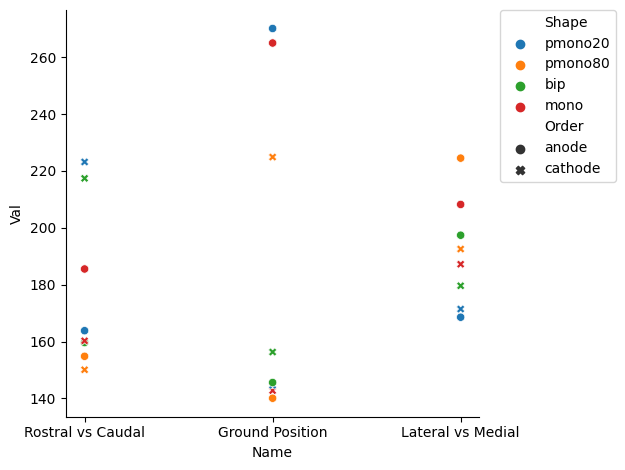

In [ ]:
sns.scatterplot(data=df, x="Name", y="Val", hue = "Shape", style = "Order")
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

In [ ]:
"L-M" in "R-C bip"

False

In [ ]:
"M-L" in "R-C bip"

False

In [ ]:

combinations_no_response


[('amap04', 'C7M-C7L', '20-0-80-25'),
 ('amap05', '-C6L', '80-0-20-400'),
 ('amap07', 'C6L-', '50-0-50-0'),
 ('amap05', '-C7L', '50-0-50-100'),
 ('amap02', '-C8L', '50-0-50-0'),
 ('amap04', 'C7L-C6L', '80-0-20-400'),
 ('amap01', '-C8L', '50-0-50-100'),
 ('amap03', '-C7L', '50-0-50-0'),
 ('amap01', 'C8L-', '50-0-50-0'),
 ('amap04', 'C7L-', '20-0-80-25'),
 ('amap05', 'C7L-C6L', '20-0-80-25'),
 ('amap08', 'C6M-C6L', '80-0-20-400'),
 ('amap08', '-C7L', '80-0-20-400'),
 ('amap01', 'C7L-C7M', '50-0-50-0'),
 ('amap06', '-C6L', '50-0-50-100'),
 ('amap02', 'C7L-C8L', '20-0-80-25'),
 ('amap01', 'C7L-', '50-0-50-100'),
 ('amap04', 'C6L-', '50-0-50-100'),
 ('amap05', '-C7L', '50-0-50-0'),
 ('amap01', '-C8L', '50-0-50-0'),
 ('amap04', '-C7L', '50-0-50-100'),
 ('amap01', 'C8L-C7L', '50-0-50-100'),
 ('amap08', 'C6L-C7L', '20-0-80-25'),
 ('amap04', 'C7L-C6L', '20-0-80-25'),
 ('amap06', '-C6L', '50-0-50-0'),
 ('amap01', 'C7L-C8L', '20-0-80-25'),
 ('amap01', 'C7L-', '50-0-50-0'),
 ('amap02', 'C8M-C8L', 

## Function for matrix

In [ ]:
# sns.heatmap

#give rat, muscle, level and keep only those in combinations no response
def hm (*args):
    #args is rat,level,muscle

    combo_no_response = [(c[0], c[1], c[2],c[3]) for c in combo]
    combo_no_response = set(combo_no_response)
    combo_no_response = list(combo_no_response)
    if "amap" in args[0]:
        combo_no_response = [c for c in combo_no_response if c[0] == args[0] and c[1] == args[1] and c[3] == args[2]]
    elif "C" in args[0]:
        combo_no_response = [c for c in combo_no_response if args[0] in c[1] and c[0] == args[1] and c[3] == args[2]]
    combo_no_response = sorted(combo_no_response, key=lambda x: x[2])
    
    sem = []
    diffs = []
    pr = []
    shape_list = list(set(s[2] for s in combo))
    for c in combo_no_response:
        c1 = combo[(c)]["a"]
        for ct in combo_no_response:
        
            c2 = combo[(ct)]["a"]
            
            diffs.append(c1.mean() - c2.mean())
            sem.append((c1-c2).reshape(-1,).std()*2)
            pr.append((c1 < c2).mean())

    diffs = np.array(diffs).reshape(len(combo_no_response),len(combo_no_response))
    sem = np.array(sem).reshape(len(combo_no_response),len(combo_no_response))
    pr = np.array(pr).reshape(len(combo_no_response),len(combo_no_response))

    positive_counts = (diffs > 0).sum(axis=1)
    sorted_indices = np.argsort(positive_counts)
    sorted_data = diffs[sorted_indices][:,sorted_indices]
    sorted_sem = sem[sorted_indices][:,sorted_indices]

    labs = [c[1] + " "+ c[2] for c in combo_no_response]
    for i in range(len(labs)):
        if "50-0-50-100" in labs[i]:
            labs[i] = labs[i].replace("50-0-50-100", "Bipolar")
        elif "50-0-50-0" in labs[i]:
            labs[i] = labs[i].replace("50-0-50-0", "Monopolar")
        elif "80-0-20-400" in labs[i]:
            labs[i] = labs[i].replace("80-0-20-400", "Mono P80")
        elif "20-0-80-25" in labs[i]:
            labs[i] = labs[i].replace("20-0-80-25", "Mono P20")
    sorted_labs = [labs[i] for i in sorted_indices]

    top25 = len(sorted_indices)/4
    top25 = [labs[i] for i in sorted_indices[:int(top25)]]
    bottom25 = len(sorted_indices)/4
    bottom25 = [labs[i] for i in sorted_indices[-int(bottom25):]]

    # labs = [c[1]+" " + c[2] for c in combo_no_response]
    # sorted_labs = [labs[i] for i in sorted_indices]
    # reps = {"50-0-50-100":"Bipolar", "50-0-50-0":"Monopolar", "80-0-20-400":"Mono P80", "20-0-80-25":"Mono P20"}
    # labs = ([reps.get(x,x) for x in labs])
    mask = (abs(sorted_data) < abs(sorted_sem)) | (abs(sorted_data) == abs(sorted_sem))
    masked_data = np.where(mask, np.nan, sorted_data)

    titl = f"{args[0]}, {args[1]}, {args[2]}"
    plt.figure(figsize=(24, 20))
    fig, axes = plt.subplots(
        nrows=1, ncols=1, figsize=(20, 20),
        constrained_layout=True, squeeze=False
    )
    ax = axes[0, 0]
    # ax = sns.heatmap(sorted_data,cmap="bwr", annot=True, xticklabels=sorted_labs, yticklabels=sorted_labs)
    sns.heatmap(masked_data,cmap="bwr", annot=masked_data, xticklabels=sorted_labs, yticklabels=sorted_labs, annot_kws={'va':'bottom'}, ax=ax)
    sns.heatmap(masked_data,cmap="bwr", annot=sorted_sem, xticklabels=sorted_labs, yticklabels=sorted_labs, annot_kws={'va':'top'}, ax=ax, cbar=False, mask = mask)
    # sns.heatmap(sorted_data,cmap="bwr", annot=pr, xticklabels=sorted_labs, yticklabels=sorted_labs, annot_kws={'va':'top'}, ax=ax, cbar=False)
    ax.set(title= titl)

    for (i, j), val in np.ndenumerate(sorted_data):
        if mask[i, j]:
            plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color='black'))

    SL = {
        "Bipolar":"blue", 
        "Monopolar":"Red", 
        "Mono P80":"orange", 
        "Mono P20":"purple"
        }
    

    # Apply color to y labels based on the condition
    for label in ax.get_yticklabels():
        for k, c in SL.items():
            if k in label.get_text():
                label.set_color(c)
                break

    # Apply color to x labels based on the condition (assuming symmetrical conditions)
    for label in ax.get_xticklabels():
        for k, c in SL.items():
            if k in label.get_text():
                label.set_color(c)
                break

    # plt.show()
    plt.close()
    return top25, bottom25, fig, sorted_labs
    

In [ ]:
# Iterate through combos and get top 25 and bottom 25
top25 = []
bottom25 = []
position = list(set(s[1].split("C")[1][0] for s in combo))
position = ["C" + x for x in position]
sorted_labs = []

poss_combo = []
for p in position:
    for k in combo.keys():
        if p in k[1]:
            poss_combo.append([k[0], p, k[3]])

poss_combo = np.unique(poss_combo, axis=0)

for k in poss_combo:
    print(k[0], k[1], k[2])
    a,b, fig, sorted_lab = hm(k[1], k[0], k[2])
    sorted_lab = [(k[0], k[2], sorted_lab)]
    sorted_labs.extend(sorted_lab)
    # top25.extend(a)
    # bottom25.extend(b)
    # fig.savefig(f"/home/andres/test{k[0]}_{k[1]}_{k[2]}.png")

TypeError: 'list' object is not callable

In [ ]:
data = sorted_labs
data_frame = pd.DataFrame(data, columns=['Subject', 'Muscle', 'Ranks'])
data_frame

for m in data_frame.Muscle.unique():
    sns.catplot(data=data_frame, x="Subject", y="Ranks", hue="Muscle", kind="point")

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [ ]:
sorted_labs

[('amap01',
  'LADM',
  ['C7L-C7M Bipolar',
   'C7M-C7L Mono P20',
   'C7L-C8L Mono P80',
   'C8L-C7L Bipolar',
   'C7L- Mono P80',
   'C7L-C8L Mono P20',
   'C7M-C7L Mono P80',
   'C7L- Mono P20',
   'C8L-C7L Mono P20',
   'C7L-C8L Bipolar',
   'C7L-C8L Monopolar',
   'C7L-C7M Mono P80',
   'C8L-C7L Monopolar',
   '-C7L Bipolar',
   '-C7L Mono P20',
   'C8L-C7L Mono P80',
   '-C7L Monopolar',
   'C7M-C7L Bipolar',
   'C7L- Bipolar',
   'C7M-C7L Monopolar',
   '-C7L Mono P80',
   'C7L-C7M Mono P20',
   'C7L-C7M Monopolar',
   'C7L- Monopolar']),
 ('amap01',
  'LBiceps',
  ['C7L- Mono P80',
   'C7L- Bipolar',
   'C7L-C8L Mono P80',
   '-C7L Monopolar',
   'C7L-C8L Bipolar',
   '-C7L Bipolar',
   '-C7L Mono P20',
   'C8L-C7L Bipolar',
   'C8L-C7L Monopolar',
   'C8L-C7L Mono P80',
   'C8L-C7L Mono P20',
   'C7M-C7L Mono P80',
   'C7L-C8L Mono P20',
   '-C7L Mono P80',
   'C7L-C7M Monopolar',
   'C7L- Monopolar',
   'C7L-C7M Bipolar',
   'C7L-C8L Monopolar',
   'C7L-C7M Mono P80',
   'C7M

In [ ]:
#variable for ranks
Ranks = []
targs = set(sorted_labs[0][2])
for t in targs:
    print(t)
    for i in range(len(sorted_labs)):
        list = sorted_labs[i][2]
        if t in list:
            Rank = [t,(list.index(t)),sorted_labs[i][1], sorted_labs[i][0]]
            Ranks.append(Rank)

Ranks

C7L- Mono P20
C7L-C7M Monopolar
C7M-C7L Mono P20
C7L-C8L Mono P80
C8L-C7L Monopolar
C7L-C8L Bipolar
C7L- Mono P80
C7M-C7L Bipolar
C7L-C7M Bipolar
C7L-C8L Monopolar
C7L-C7M Mono P80
C7L-C8L Mono P20
C7M-C7L Monopolar
-C7L Monopolar
C8L-C7L Mono P20
C7L- Bipolar
C8L-C7L Bipolar
-C7L Bipolar
C7M-C7L Mono P80
-C7L Mono P20
C8L-C7L Mono P80
-C7L Mono P80
C7L-C7M Mono P20
C7L- Monopolar


[['C7L- Mono P20', 7, 'LADM', 'amap01'],
 ['C7L- Mono P20', 23, 'LBiceps', 'amap01'],
 ['C7L- Mono P20', 15, 'LDeltoid', 'amap01'],
 ['C7L- Mono P20', 7, 'LECR', 'amap01'],
 ['C7L- Mono P20', 16, 'LFCR', 'amap01'],
 ['C7L- Mono P20', 22, 'LTriceps', 'amap01'],
 ['C7L- Mono P20', 23, 'LADM', 'amap02'],
 ['C7L- Mono P20', 23, 'LBiceps', 'amap02'],
 ['C7L- Mono P20', 23, 'LDeltoid', 'amap02'],
 ['C7L- Mono P20', 22, 'LECR', 'amap02'],
 ['C7L- Mono P20', 22, 'LFCR', 'amap02'],
 ['C7L- Mono P20', 22, 'LTriceps', 'amap02'],
 ['C7L- Mono P20', 21, 'LADM', 'amap03'],
 ['C7L- Mono P20', 21, 'LBiceps', 'amap03'],
 ['C7L- Mono P20', 17, 'LDeltoid', 'amap03'],
 ['C7L- Mono P20', 22, 'LECR', 'amap03'],
 ['C7L- Mono P20', 21, 'LFCR', 'amap03'],
 ['C7L- Mono P20', 16, 'LTriceps', 'amap03'],
 ['C7L- Mono P20', 23, 'LADM', 'amap04'],
 ['C7L- Mono P20', 22, 'LBiceps', 'amap04'],
 ['C7L- Mono P20', 23, 'LDeltoid', 'amap04'],
 ['C7L- Mono P20', 23, 'LECR', 'amap04'],
 ['C7L- Mono P20', 19, 'LFCR', 'amap04

In [ ]:
data = Ranks
data_frame = pd.DataFrame(data, columns=['Subject', 'Ranks', 'Muscle', 'SubjectID'])
data_frame

# for m in data_frame.Muscle.unique():
#     g = sns.catplot(data=data_frame, x="SubjectID", y="Ranks", hue="Subject", kind="point").set(title = f"{m}")

def plot_ranks(*args):
    #data_frame, muscle)
    muscles = ['LADM', 'LBiceps', 'LDeltoid', 'LECR', 'LFCR', 'LTriceps']
    if args[1] in muscles:
        data = args[0]
        data_filt = data.loc[lambda x: x['Muscle'] == args[1]]
        if 
        g = sns.catplot(data=data_filt, x="SubjectID", y="Ranks", hue="Subject", kind="point").set(title = f"{args[1]}")
    else:         
        g = sns.catplot(data=data_frame, x="SubjectID", y="Ranks", hue="Subject", kind="point").set(title = f"{m}")


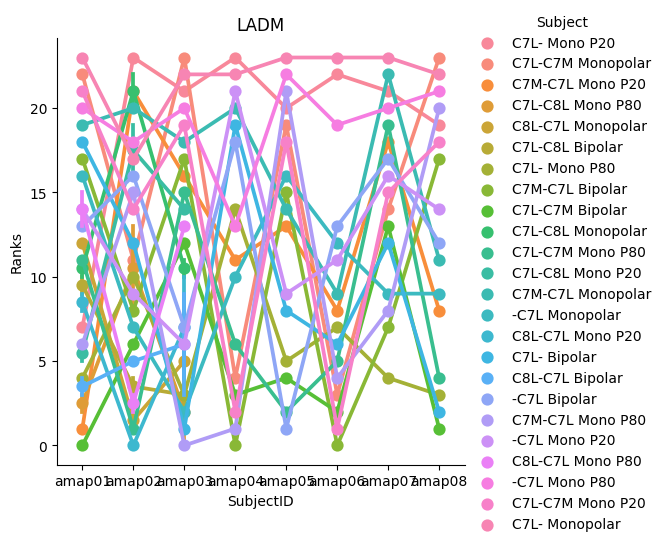

In [ ]:
plot_ranks(data_frame, 'LADM')

In [ ]:
#Get the number of occurances for top and bottom 25%
top25_copy = set(top25)
top25_copy
sorted(top25)
top_occurances = []
for i in top25_copy:
    tempcout = top25.count(i)
    top_occurances.append([i, tempcout]) #, tempcout)

top25 = sorted(top_occurances, key=lambda x: x[1], reverse=True)

bottom25_copy = set(bottom25)
sorted(bottom25)
bot_occurances = []
for i in bottom25_copy:
    tempcout = bottom25.count(i)
    bot_occurances.append([i, tempcout]) #, tempcout)

bottom25 = sorted(bot_occurances, key=lambda x: x[1], reverse=True)

<BarContainer object of 0 artists>

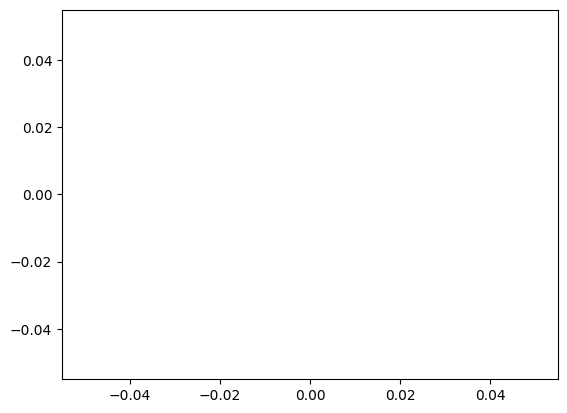

In [ ]:
x = []
y = []
for i in top25:
    x = x.append(i[0])
    y = y.append(i[1])
plt.bar(x,y)

In [ ]:
top25

[]

In [ ]:
a,b,g = hm("C8", "amap06","LADM")


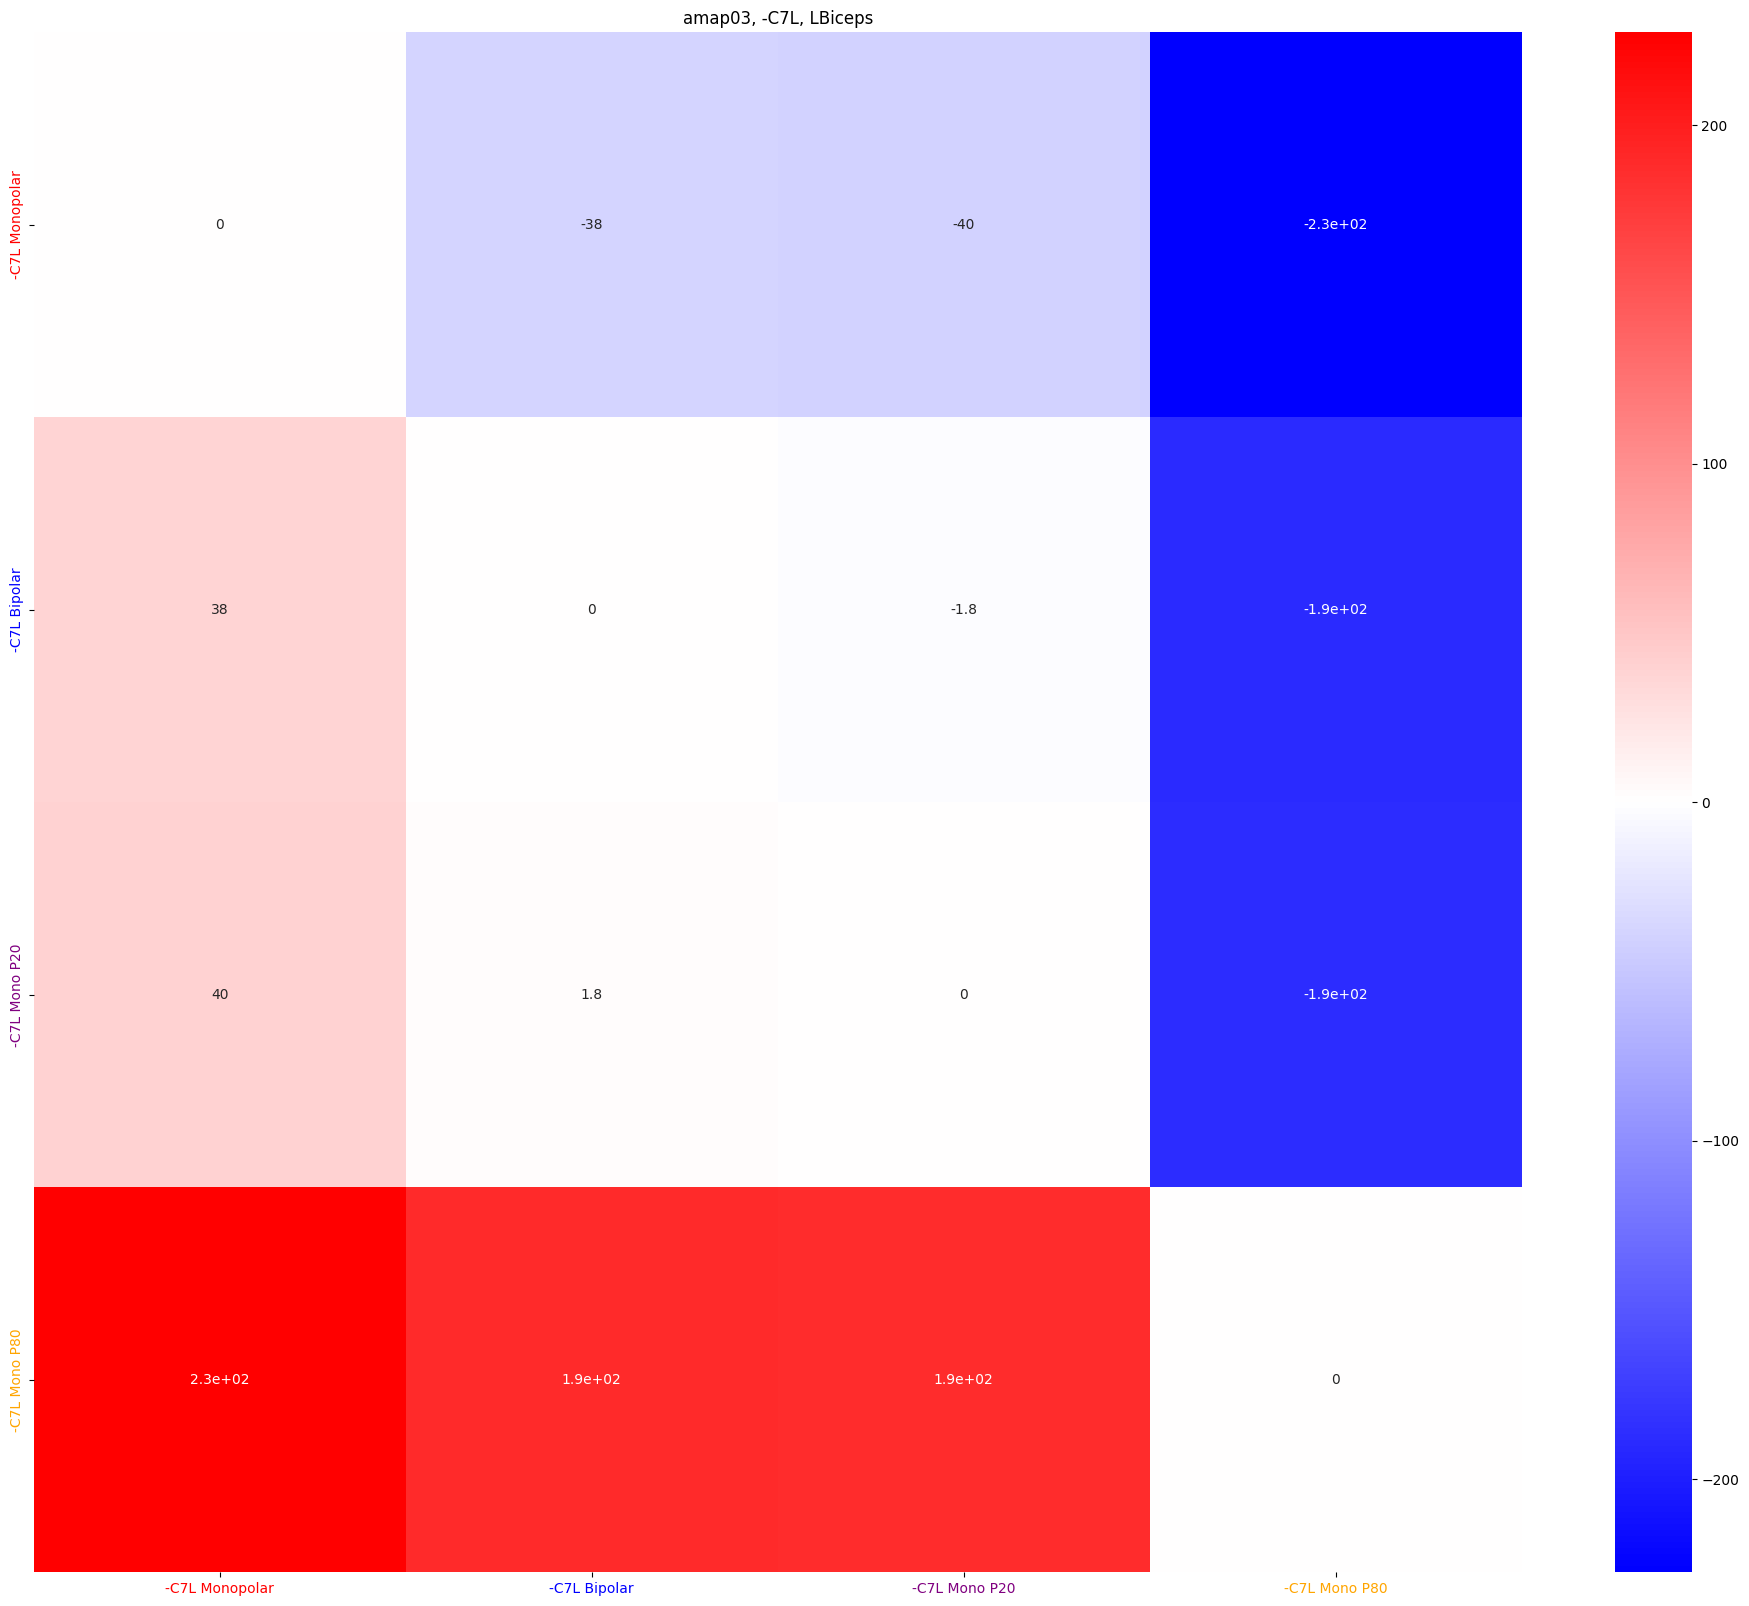

In [ ]:
hm("amap03","-C7L","LBiceps")